In [1]:
import os

%load_ext autoreload
%autoreload 2

""""
Devo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of
each class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.

Psychoprim --> goal is to decoder the base prims, given an ambiguous middle prim

"""

'"\nDevo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of\neach class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.\n\nPsychoprim --> goal is to decoder the base prims, given an ambiguous middle prim\n\n'

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [ ]:
# Method 1 - load a single DFallPA
DFallpa = load_handsaved_wrapper()


In [3]:
# Method 1 - load a single DFallPA
animal = "Diego"
date = 240521
DFallpa = load_handsaved_wrapper(animal=animal, date=date, version="trial")


TODO: Pancho -- combine circles with the tohers


In [ ]:
# # Method 2 - Combine two dfallpa
# DFallpa1 = load_handsaved_wrapper(animal="Diego", date=230630, version="trial")
# DFallpa2 = load_handsaved_wrapper(animal="Diego", date=230630, version="stroke")
# DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


In [ ]:
# # Method 2 - Combine two dfallpa
# animal = "Diego"
# date = 231211
# COMBINE_AREAS = True

# DFallpa1 = load_handsaved_wrapper(animal=animal, date=date, version="trial", combine_areas=COMBINE_AREAS, use_time=False)
# DFallpa2 = load_handsaved_wrapper(animal=animal, date=date, version="stroke", combine_areas=COMBINE_AREAS, use_time=False)
# DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


# Preprocessing

In [4]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [5]:

# Prune to chans that are common across pa for each bregion (intersection of chans)|
dfpa_match_chans_across_pa_each_bregion(DFallpa)

M1  ...  50
M1  ...  50
M1  ...  50
M1  -- n chans final:  50
PMv  ...  59
PMv  ...  59
PMv  ...  59
PMv  -- n chans final:  59
PMd  ...  46
PMd  ...  46
PMd  ...  46
PMd  -- n chans final:  46
dlPFC  ...  28
dlPFC  ...  28
dlPFC  ...  28
dlPFC  -- n chans final:  28
vlPFC  ...  43
vlPFC  ...  43
vlPFC  ...  43
vlPFC  -- n chans final:  43
FP  ...  56
FP  ...  56
FP  ...  56
FP  -- n chans final:  56
SMA  ...  57
SMA  ...  57
SMA  ...  57
SMA  -- n chans final:  57
preSMA  ...  54
preSMA  ...  54
preSMA  ...  54
preSMA  -- n chans final:  54


In [6]:
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/decode_moment/PSYCHO_SP/{animal}-{date}"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

/lemur2/lucas/analyses/recordings/main/decode_moment/PSYCHO_SP/Diego-240521


# Preprocessing

##### Devo -- removing noisy channels

In [7]:
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels
dfpa_concatbregion_preprocess_clean_bad_channels(DFallpa, PLOT=False)

Keep, for  M1  ... 47 / 50
Keep, for  PMv  ... 59 / 59
Keep, for  PMd  ... 45 / 46
Keep, for  dlPFC  ... 26 / 28
Keep, for  vlPFC  ... 42 / 43
Keep, for  FP  ... 35 / 56
Keep, for  SMA  ... 55 / 57
Keep, for  preSMA  ... 53 / 54


# Sqrt normalization

In [8]:
for pa in DFallpa["pa"]:
    pa.X = pa.X**0.5

### FR Normalization

##### Method 1 - each PA normalize independently

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

##### Method 2 - Concat events (for each bregion) and normalize all same way


In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
dfpa_concat_normalize_fr_split_multbregion(DFallpa)


##### Method 3 - concat events (flexible version, only constrianed to have same n chans across PA) [works if have both trial and stroke!]

Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA


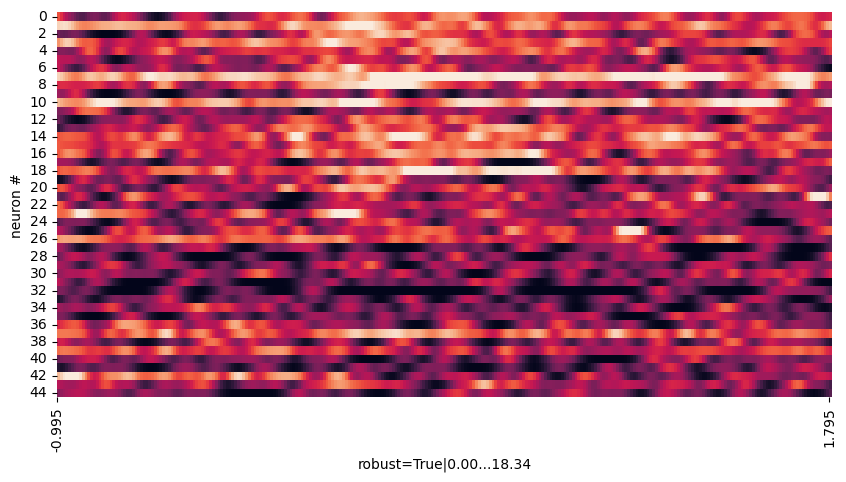

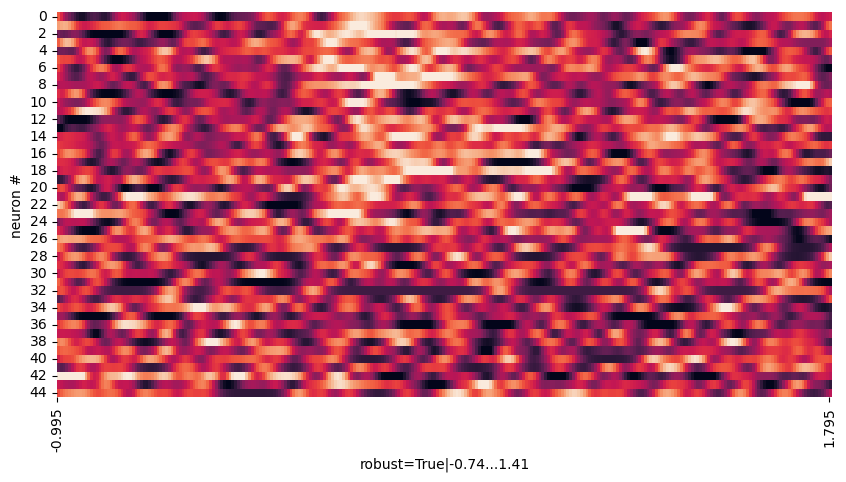

In [9]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion_flex
fr_mean_subtract_method = "across_time_bins"
# fr_mean_subtract_method = "each_time_bin"
PLOT=False

pa = DFallpa["pa"].values[10]
pa.plotNeurHeat(0)

dfpa_concat_normalize_fr_split_multbregion_flex(DFallpa, fr_mean_subtract_method, PLOT)

pa = DFallpa["pa"].values[10]
pa.plotNeurHeat(0)

# Extract relevant variables


In [10]:
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import dfallpa_preprocess_condition
# shape_var_suff = "shapesemgrp"|
# loc_var_suff = "loc_on_clust"
shape_var_suff = "shape"
loc_var_suff = "loc"
dfallpa_preprocess_condition(DFallpa, shape_var_suff, loc_var_suff)

0
['FEAT_num_strokes_beh', 'FEAT_num_strokes_task', 'INSTRUCTION_COLOR', 'Tkbeh_stkbeh', 'Tkbeh_stktask', 'Tktask', 'aborted', 'bregion', 'character', 'donepos', 'epoch', 'epoch_orig', 'epochset', 'event', 'event_time', 'gridsize', 'index_datapt', 'loc_this_event', 'origin', 'probe', 'seqc_0_angle', 'seqc_0_angle_binned', 'seqc_0_center_binned', 'seqc_0_loc', 'seqc_0_loc_on_clust', 'seqc_0_locon', 'seqc_0_locon_binned', 'seqc_0_locx', 'seqc_0_locy', 'seqc_0_shape', 'seqc_0_shapesem', 'seqc_0_shapesemcat', 'seqc_0_shapesemgrp', 'seqc_1_angle', 'seqc_1_angle_binned', 'seqc_1_center_binned', 'seqc_1_loc', 'seqc_1_loc_on_clust', 'seqc_1_locon', 'seqc_1_locon_binned', 'seqc_1_locx', 'seqc_1_locy', 'seqc_1_shape', 'seqc_1_shapesem', 'seqc_1_shapesemcat', 'seqc_1_shapesemgrp', 'seqc_2_angle', 'seqc_2_angle_binned', 'seqc_2_center_binned', 'seqc_2_loc', 'seqc_2_loc_on_clust', 'seqc_2_locon', 'seqc_2_locon_binned', 'seqc_2_locx', 'seqc_2_locy', 'seqc_2_shape', 'seqc_2_shapesem', 'seqc_2_shapese

# Extract beh data

In [12]:
from neuralmonkey.analyses.decode_moment import analy_psychoprim_prepare_beh_dataset
DSmorphsets, map_tc_to_morph_info, map_morphset_to_basemorphinfo, map_tcmorphset_to_idxmorph, map_tcmorphset_to_info, map_morphsetidx_to_assignedbase_or_ambig, map_tc_to_morph_status = analy_psychoprim_prepare_beh_dataset(animal, date)

Searching using this string:
/home/lucas/code/drawmonkey/expt_metadat/*240521-*Diego.**
Found this many paths:
0
Searching using this string:
/home/lucas/code/drawmonkey/expt_metadat_daily/*240521-*Diego.**
Found this many paths:
1
---
/home/lucas/code/drawmonkey/expt_metadat_daily/primdiego1f3-240521-Diego.yaml
Loading this dataset Diego primdiego1f3 240521
Searching using this string:
/lemur2/lucas/analyses/database/*Diego-*primdiego1f3-*240521-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/lemur2/lucas/analyses/database/BEH/*Diego-*primdiego1f3-*240521-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/home/lucas/mnt/Freiwald_kgupta/kgupta/analyses/database/*Diego-*primdiego1f3-*240521-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/home/lucas/mnt/Freiwald_kgupta/kgupta/analyses/database/BEH/*Diego-*primdiego1f3-*240521-*/*dat*.pkl
--

# Train / test

In [ ]:
from neuralmonkey.analyses.decode_moment import train_decoder_helper, pipeline_train_test_scalar_score, pipeline_train_test_scalar_score_mult_train_dataset, test_decoder_helper, train_decoder_helper_extract_train_dataset
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import get_dataset_params
import os

In [ ]:
# get list of base prim names

### [GOOD] Train on data for a specific morphset -- get average score across trials


In [ ]:
from pythonlib.tools.plottools import savefig
# SAVEDIR = "/tmp/decoder_each_morphset"
print(SAVEDIR)

##### [GOOD] Loop over all morphsets

In [ ]:
from neuralmonkey.analyses.decode_moment import analy_psychoprim_score_postsamp
analy_psychoprim_score_postsamp(DFallpa, DSmorphsets, 
                                    map_tcmorphset_to_idxmorph, map_morphsetidx_to_assignedbase_or_ambig,
                                    map_tcmorphset_to_info,
                                    SAVEDIR)

In [ ]:
# TWIND_TEST = (0.05, 0.6)
TWIND_TEST = (0.05, 1.2)

# Subtrract baseline?
subtract_baseline=False
subtract_baseline_twind=None
include_null_data = True
do_upsample_balance=True
PLOT_DECODER = True
n_min_per_var = 6
prune_labels_exist_in_train_and_test = False


##### [Devo] METHOD 1 -- not doing train/test split of trials 


In [ ]:
# NOTE: This goes in analy_psychoprim_score_postsamp

In [ ]:
SAVEDIR = "/tmp/no_null"

In [ ]:
only_train_on_base_prims=True

In [ ]:

downsample_trials = False
bregion = "PMv"
morphset = 3
HACK = True

# pa = extract_single_pa(DFallpa, bregion, None, "trial", "03_samp")

for pa in DFallpa["pa"].values:
    dflab = pa.Xlabels["trials"]
    dflab["idx_morph_temp"] = [map_tcmorphset_to_idxmorph[(tc, morphset)] for tc in dflab["trialcode"]]


# Train on all the base_prims data
idx_exist = sorted(list(set([x for x in dflab["idx_morph_temp"] if x!="not_in_set"])))
if only_train_on_base_prims:
    idx_exist_train = [0, 3, 99]
    if HACK:
        idx_exist_train += [3]  # trying training on (base1, morph of interest, base2)
else:
    idx_exist_train = idx_exist

event_train = "03_samp"
twind_train = (0.1, 1.8)
filterdict_train = {"idx_morph_temp":idx_exist_train}
var_train = "idx_morph_temp"

# Test on morphed data - get all here
var_test = "idx_morph_temp"
event_test = "03_samp"
filterdict_test = {"idx_morph_temp":idx_exist}
list_twind_test = [TWIND_TEST]
which_level_test = "trial"


# Other params
savedir = f"{SAVEDIR}/{bregion}/morphset={morphset}/decoder_training"
os.makedirs(savedir, exist_ok=True)
print(savedir)

dfscores, Dc, PAtrain, PAtest = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, 
                                                                twind_train, filterdict_train,
                                    var_test, event_test, list_twind_test, filterdict_test, savedir,
                                    include_null_data=include_null_data, decoder_method_index=None,
                                    prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, PLOT=PLOT_DECODER,
                                    which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                    subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                    do_upsample_balance=do_upsample_balance, downsample_trials=downsample_trials)
dfscores["morph_set_idx"] = morphset


##### [Devo] METHOD 2 -- new - doing train/test split -- ask if base1/base2 decoders are better than own decoder (for ambig tasks)

In [ ]:
from neuralmonkey.analyses.decode_moment import analy_psychoprim_score_postsamp_better
SAVEDIR_BASE = "/tmp/PSYCHOPRIM"
analy_psychoprim_score_postsamp_better(DFallpa, DSmorphsets, 
                                    map_tcmorphset_to_idxmorph, map_morphsetidx_to_assignedbase_or_ambig,
                                    map_tcmorphset_to_info,
                                    SAVEDIR_BASE, PLOT_EACH_IDX=False)


##### Older stuff

In [ ]:
sdir = "/tmp/test"
os.makedirs(sdir, exist_ok=True)
Dc.scalar_score_df_plot_summary(dfscores_testsplit, sdir)

In [ ]:
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
dfthis = dfscores_testsplit
var_score = "score"
task_vars = ["morph_set_idx", "pa_class"]

_, fig = plot_45scatter_means_flexible_grouping(dfthis, "decoder_class_semantic_good", "base1", "base2",
                                    "trial_morph_assigned_to_which_base", var_score, task_vars,
                                    plot_text=True, shareaxes=True, SIZE=6, alpha=0.3);

_, fig = plot_45scatter_means_flexible_grouping(dfthis, "trial_morph_assigned_to_which_base", "ambig_base1", "ambig_base2",
                                    "decoder_class", var_score, task_vars,
                                    plot_text=True, shareaxes=True, SIZE=6, alpha=0.3);
# savefig(fig, f"{savedir}/scatter-x=decoder_class_semantic_good-y=trial_morph_assigned_to_which_base-dfthis_str={dfthis_str}-var_score={var_score}.pdf")


In [ ]:
DcNull = Dc

In [ ]:
DcNoNull = Dc

In [ ]:
# TODO Label the pa class by the image similarity to base1 or base 2
# Also for chars





In [ ]:
#

### Plot single trials

In [ ]:
# TRAINING - Plot an example training trial

indtrial = 13
dflab = PAtrain.Xlabels['trials']
print(f"For this trial {indtrial}, {Dc.VarDecode} = {dflab.iloc[indtrial][Dc.VarDecode]}")
Dc.plot_single_trial(indtrial, PA=PAtrain);


In [ ]:
# TESTING

In [ ]:
# First, extract PA

idx_in_morphset = 4
trialcodes = find_morphset_morphidx(DSmorphsets, morphset, idx_in_morphset)


[(i, " --- ", map_tcmorphset_to_info[(tc, morphset)]) for i, tc in enumerate(trialcodes)]

In [ ]:
#

tc = trialcodes[13]

dflab = PAtest.Xlabels["trials"]

indtrial = dflab[dflab["trialcode"] == tc].index.tolist()[0]

print("Trialcode: ", tc, ", idx=", indtrial)
print(f"For this trial {indtrial}, {Dc.VarDecode} = {dflab.iloc[indtrial][Dc.VarDecode]}")

# What was actually drawn on this trial?
print("What was actually drawn on this trial?", map_tcmorphset_to_info[(tc, morphset)])

tbin_dur=0.15
tbin_slide=0.01
if False:
    Dc.plot_single_trial(indtrial, PA=PAtest, tbin_dur=tbin_dur, tbin_slide=tbin_slide);
else:
    # Hack, testing out if including null helps
    Dc.plot_single_trial(indtrial, PA=PAtest, tbin_dur=tbin_dur, tbin_slide=tbin_slide);
    DcNoNull.plot_single_trial(indtrial, PA=PAtest, tbin_dur=tbin_dur, tbin_slide=tbin_slide);
    DcNull.plot_single_trial(indtrial, PA=PAtest, tbin_dur=tbin_dur, tbin_slide=tbin_slide);


In [ ]:
# TODO

# Timecourse plots

### Useing single case for the one trinaed on [B1 M B2]

##### A single decode train-test split (i.e., is not good, not testing on held out)

In [ ]:
dfscores_testsplit, dfscores_usertest, decoders, trainsets, PAtest

In [ ]:
idx_trainsplit = 0
Dc = decoders[idx_trainsplit]
PAtrain_orig = trainsets[idx_trainsplit]["PAtrain_orig"]
test_index_PAtrain_orig = trainsets[idx_trainsplit]["test_index_PAtrain_orig"]

# Slice out the test dataset
if False:
    patest = PAtrain_orig.slice_by_dim_indices_wrapper("trials", test_index_PAtrain_orig, reset_trial_indices=True)
else:
    patest = PAtrain_orig


##### [Good] loop thru each train-test split, and collect data from test trials.

In [ ]:
# For the same decoder idx, overlay means from diff trials

assert False, "in progress -- need to color each line differntly.."

decoder_idx = 0
list_inds = [[0,1,2], [3,4,5]]

fig, ax = plt.subplots()
for indstrials in list_inds:

    probs_mat_all_this = probs_mat_all[indstrials, :, decoder_idx][:, :, None]
    Dc._timeseries_plot_by_shape_drawn_order(probs_mat_all_this, times, ["test"], MAP_INDEX_TO_COL, ax)
    # ax.set_title(f"{idx_within}, {assigned}")
    # ax.set_title(f"{idx_within}, {_assigned}")


In [ ]:
dfres = pd.DataFrame(res)
dfres

In [ ]:
# Q: is (base1 decode during ambig_base2) higher than (base1 decode during base2)

decoder_class = 99




def _extract_probs_mat(dfres, labels, idx_within, _assigned, decoder_class):
    tmp = dfres[(dfres["idx_within"] == idx_within) & (dfres["_assigned"] == _assigned)]
    assert len(tmp)==1
    probs_mat_all_this = tmp["probs_mat_all_this"].values[0] # (trials, times, labels)
    idx_decode = labels.index(decoder_class)
    probs_mat = probs_mat_all_this[:, :, idx_decode]
    return probs_mat

idx_within = 3
_assigned = "ambig_base1"
probs_mat_1 = _extract_probs_mat(dfres, labels, idx_within, _assigned, decoder_class)

idx_within = 0
_assigned = "base1"
probs_mat_2 = _extract_probs_mat(dfres, labels, idx_within, _assigned, decoder_class)

probs_vec_1 = np.mean(probs_mat_1, axis=0)
probs_vec_2 = np.mean(probs_mat_2, axis=0)

# take diff
probs_vec_diff = probs_vec_1 - probs_vec_2

fig, ax = plt.subplots()

ax.plot(times, probs_vec_diff)


In [ ]:
# Subtract baseline trials (when the)

# State space plots

In [ ]:
# Subtrract baseline?
subtract_baseline=False
subtract_baseline_twind=None
include_null_data = False
do_upsample_balance=True
PLOT_DECODER = True
n_min_per_var = 6
prune_labels_exist_in_train_and_test = True


bregion = "PMv"

list_morphset = sorted(DSmorphsets.Dat["morph_set_idx"].unique().tolist())
for downsample_trials in [True, False]:
    list_df = []
    for morphset in list_morphset:
        # Given morphset, assign new column which is the trial's role in that morphset.

        for pa in DFallpa["pa"].values:
            dflab = pa.Xlabels["trials"]
            dflab["idx_morph_temp"] = [map_tcmorphset_to_idxmorph[(tc, morphset)] for tc in dflab["trialcode"]]

        # Train on all the base_prims data
        idx_exist = sorted(list(set([x for x in dflab["idx_morph_temp"] if x!="not_in_set"])))

        event_train = "03_samp"
        twind_train = (0.1, 1.8)
        filterdict_train = {"idx_morph_temp":idx_exist}
        var_train = "idx_morph_temp"

        # Test on morphed data - get all here
        var_test = "idx_morph_temp"
        event_test = "03_samp"
        filterdict_test = {"idx_morph_temp":idx_exist}
        list_twind_test = [(0.1, 1.8)]
        which_level_test = "trial"


        # Other params
        savedir = f"{SAVEDIR}/{bregion}/morphset={morphset}/decoder_training"
        os.makedirs(savedir, exist_ok=True)
        print(savedir)
        
        dfscores, Dc, PAtrain, PAtest = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, 
                                                                        twind_train, filterdict_train,
                                            var_test, event_test, list_twind_test, filterdict_test, savedir,
                                            include_null_data=include_null_data, decoder_method_index=None,
                                            prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, PLOT=PLOT_DECODER,
                                            which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                            subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                            do_upsample_balance=do_upsample_balance, downsample_trials=downsample_trials)
        dfscores["morph_set_idx"] = morphset


        ##### Store features related to psycho
        list_idx = sorted(DSmorphsets.Dat[DSmorphsets.Dat["morph_set_idx"] == morphset]["morph_idxcode_within_set"].unique().tolist())
        dfscores["pa_morph_assigned_baseorambig"] = [map_morphsetidx_to_assignedbase_or_ambig[(morphset, idx_morph_temp)] for idx_morph_temp in dfscores["pa_class"]]

        #### Recoding classes, to allow averaging over all data.

        # PA class --> already done, "pa_morph_assigned_baseorambig"
        # Decoder class
            # For each pa, group the decoder classes into semantic groupings, to allow averaging over all data.
            # (base1, interm1, same, interm2, base2)

        tmp = []
        for i, row in dfscores.iterrows():

            if row["decoder_class"] == 0:
                decoder_class_semantic_good = "base1"
            elif row["decoder_class"] == 99:
                decoder_class_semantic_good = "base2"
            elif row["decoder_class"] == row["pa_class"]:
                assert row["same_class"]
                decoder_class_semantic_good = "same"
            else:
                # Is this to left or right of pa class
                if row["decoder_class"]<row["pa_class"]:
                    decoder_class_semantic_good = "interm1"
                elif row["decoder_class"]>row["pa_class"]:
                    decoder_class_semantic_good = "interm2"
                else:
                    assert False
            tmp.append(decoder_class_semantic_good)
        dfscores["decoder_class_semantic_good"] = tmp


        ##### Normalize each decoder, to range between min and max across the pa_classes (their means)
        y_var = "score"

        group_max = dfscores.groupby(["decoder_class"])[y_var].max().reset_index().rename(columns={y_var: f'{y_var}_max'})
        group_min = dfscores.groupby(["decoder_class"])[y_var].min().reset_index().rename(columns={y_var: f'{y_var}_max'})

        group_max
        group_max = dfscores.groupby(["decoder_class", "pa_class"])[y_var].mean().reset_index().groupby(["decoder_class"]).max().reset_index()
        group_max = group_max.rename(columns={"pa_class":"pa_class_max", y_var: f'{y_var}_max'})
        group_max

        group_min = dfscores.groupby(["decoder_class", "pa_class"])[y_var].mean().reset_index().groupby(["decoder_class"]).min().reset_index()
        group_min = group_min.rename(columns={"pa_class":"pa_class_min", y_var: f'{y_var}_min'})
        group_min
        dfscores = pd.merge(dfscores, group_max, on="decoder_class", how='left')
        dfscores = pd.merge(dfscores, group_min, on="decoder_class", how='left')

        dfscores["score_norm"] = (dfscores["score"] - dfscores["score_min"])/(dfscores["score_max"] - dfscores["score_min"])


        ######### Additional preprocessing of dscores
        # -----------------
        dfscores["trial_morph_assigned_to_which_base"] = [map_tcmorphset_to_info[(row["trialcode"], row["morph_set_idx"])][0] for i, row in dfscores.iterrows()]

        # -----------------
        # New column -- was the decoder for base1 or base2 drawn on this trial.
        # Each trial must get a match to one decoder, even if its ambiguous
        tmp = []
        for i, row in dfscores.iterrows():
            
            if row["trial_morph_assigned_to_which_base"] in ["base1", "ambig_base1", "not_ambig_base1"]:
                drew = "base1"
            elif row["trial_morph_assigned_to_which_base"] in ["base2", "ambig_base2", "not_ambig_base2"]:
                drew = "base2"
            else:
                print(row["trial_morph_assigned_to_which_base"])
                assert False

            if row["decoder_class"] == 0 and drew == "base1":
                decoder_is_drawn_base_prim = True
            elif row["decoder_class"] == 99 and drew == "base2":
                decoder_is_drawn_base_prim = True
            else:
                decoder_is_drawn_base_prim = False    

            # if i==1:
            #     print(row)
            #     print(drew)
            #     print(decoder_is_drawn_base_prim)
            #     assert False
            # assert False
            tmp.append(decoder_is_drawn_base_prim)

        dfscores["decoder_class_was_drawn"] = tmp

        # Sanity check -- each trialcode has a single case that is True
        assert np.all(dfscores[dfscores["decoder_class_was_drawn"]==True].groupby(["morph_set_idx", "trialcode"]).size().reset_index(drop=True)==1), "expect each (morph_set_idx, trialcode) to have 1 decoder (i.e, varying by idx within morpht) that matches it"





        assert False


In [ ]:
Dc.VarDecode

In [ ]:
PAtrain.

In [ ]:
savedir = "/tmp"

In [ ]:
PAtrain.

In [ ]:
# Train -- PC space.

PAtrain

savedirthis = f"{savedir}/pca_construction"
os.makedirs(savedirthis, exist_ok=True)
PLOT_STEPS = False
nmin_trials_per_lev = 5

NPCS_KEEP = 6
superv_dpca_var = Dc.VarDecode
superv_dpca_vars_group = None
twind = twind_train

reshape_method = "chans_x_trials_x_times"
tbin_dur = 0.1
Xredu, PAredu, _, _, pca = PAtrain.dataextract_pca_demixed_subspace(
    superv_dpca_var, superv_dpca_vars_group, twind, tbin_dur, savedir_plots=savedirthis,
    n_min_per_lev_lev_others=nmin_trials_per_lev, PLOT_STEPS=PLOT_STEPS,
    n_pcs_subspace_max=NPCS_KEEP, reshape_method=reshape_method)


In [ ]:
SAVEDIR_ANALYSIS = "/tmp"

In [ ]:
PAredu.X.

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_WRAPPER

In [ ]:
# Trajectory plots 

Xredu, PAredu, _, _, pca
dflab = PAredu.Xlabels["trials"]
times = PAredu.Times

##### Plot scalars
savedir = f"{SAVEDIR_ANALYSIS}/state_space_testing"
print(savedir)
os.makedirs(savedir, exist_ok=True)

list_var_color_var_subplot = [
    [Dc.VarDecode, None],
]
LIST_DIMS = [(0,1), (2,3)]
n_min_per_levo = 5
for var_color, var_subplot in list_var_color_var_subplot:
    from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
    trajgood_plot_colorby_splotby_WRAPPER(Xredu, times, dflab, var_color, savedir,
                                vars_subplot=var_subplot, list_dims=LIST_DIMS, time_bin_size=tbin_dur)
plt.close("all")

In [ ]:
Xredu.shape

In [ ]:
# Plot a single trial


### METHOD -- trial by trial scatter plots [including KDE plots...]

In [ ]:
if False:
    indtrials = list(range(20))
elif False:
    indtrials = PAtest.Xlabels["trials"][PAtest.Xlabels["trials"][Dc.VarDecode]=="0|99"].index
else:
    # First, extract PA
    morphset = 3
    idx_in_morphset = 2
    trialcodes = find_morphset_morphidx(DSmorphsets, morphset, idx_in_morphset)
    display([(i, " --- ", map_tcmorphset_to_info[(tc, morphset)]) for i, tc in enumerate(trialcodes)])

    indtrials = PAtest.Xlabels["trials"][PAtest.Xlabels["trials"]["trialcode"].isin(trialcodes)].index.tolist()
    indtrials

print(len(indtrials))
twind = (0.1, 1.8)
PAprobs, probs_mat_all, times, labels = Dc.timeseries_score_wrapper(PAtest, twind, indtrials)

In [ ]:
import seaborn as sns

In [ ]:
fig, ax = plt.subplots()
x1 = probs_mat_all[0, :, 0]
x2 = probs_mat_all[0, :, 1]

def _plot_pairwise(xvals, yvals, ax):

    # ax.plot(x1, x2, "-x", alpha=0.5)
    # sns.scatterplot(x=xvals, y=yvals, ax=ax, color="k", alpha=0.02)
    
    sns.kdeplot(x=xvals, y=yvals, ax=ax, fill=True, thresh=0, levels=50, cmap="mako")
    
    # This is the worst
    # sns.histplot(x=xvals, y=yvals, ax=ax, bins=20, stat="probability", cbar=True, alpha=0.5)
    # sns.rugplot(x=xvals, y=yvals, ax=ax, color="k", alpha=0.5)

In [ ]:
fig, ax = plt.subplots()
x1 = probs_mat_all[0, :, 0]
x2 = probs_mat_all[0, :, 1]
_plot_pairwise(x1, x2, ax)

In [ ]:
# Make plot, comparing each pair of labels

ncols = len(labels)
nrows = len(labels)
SIZE = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(nrows*SIZE, ncols*SIZE))

for i, lab1 in enumerate(labels): # rows
    for j, lab2 in enumerate(labels): # cols
        if j!=i:
            ax = axes[i][j]

            xvals = probs_mat[:, j]
            yvals = probs_mat[:, i]
            # ax.set_title((i, j))
            # ax.set_title((i, j))
            _plot_pairwise(xvals, yvals, ax)
            ax.set_xlabel(lab2)
            ax.set_ylabel(lab1)

            # assert False
